In [ ]:
# Install necessary python libaries

!pip install pandas numpy # Dataframes and transformations
!pip install plotly # Data visualization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip # Pandas Profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 22.0 MB 139 kB/s
     |████████████████████████████████| 102 kB 27.5 MB/s 
     |████████████████████████████████| 679 kB 57.6 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 9.9 MB 66.5 MB/s 
     |████████████████████████████████| 4.7 MB 82.1 MB/s 
     |████████████████████████████████| 296 kB 57.9 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=324949 sha256=b380609691c81fd73b6587dd164967295283c41eba3ff1973a5a0acf24cf1455
  Stored in directory: /tmp/pip-ephem-wheel-cache-1nj2vg7l/wheels/8e/70/3e/0fedd1728e310b5af797b1c8a9ef27ebf4046917c84a2fe736
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=dd0ac660a349ed1f710741ceb3fbf6d84e76c3ce1f0cb152e8e4e4e3eee8d1ad
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764

In [ ]:
ENERGY_DATA = './data/energy_use_data_11-29-2021.csv'
FIRE_DATA = './data/fires_data_11-29-2021.csv'
LAND_DATA = './data/land_cover_data_11-30-2021.csv'
TEMPERATURE_DATA = './data/temperature_change_data_11-29-2021.csv'
WASTE_DATA = './data/waste_disposal_data_11-29-2021.csv'
WORLD_POPULATION = './data/world_bank_population_total.csv'


In [ ]:
# Imports
import pandas as pd
import pandas as pd
import numpy as np

In [ ]:
# Read csv into pandas dataframe and create report
df = pd.read_csv(TEMPERATURE_DATA)

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Dataset Report", html={"style": {"full_width": True}}, sort=None)

In [ ]:
# Render report as embedded notebook output
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h1>What are some questions we want to answer?</h1>

<ol type="1">
  <li>How does the global average temperature change over time? </li>
  <li>What countries historically use the most energy?</li>
  <li>What countries historically are the most wastful?</li>
  <li>What countries have missing data? Which years?</li>
  <li>What countries on average have the highest burned area? Has this changed over time?</li>
  <li>What are the top 10 most wasteful countries in the past 10 years?</li>
  <li>What energy metrics that we measure can be used to determine best practice for waste management/energy consumption from other countries?</li>
  <li>Are large industrial countries processes/practices similiar to smaller countries? If so, how does these processes vary and what are the effects?</li>
</ol>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Question 1

df = pd.read_csv(TEMPERATURE_DATA)
df['value_abs'] = df['Value'].abs()
avg_df = df[['Area', 'Year', 'value_abs']]
avg_df = avg_df.groupby(['Year'], as_index=False).mean()

In [ ]:
import plotly.express as px

fig = px.line(avg_df, x="Year", y="value_abs", title='Global Temperature Change Time Series')
fig.show()

In [ ]:
# Question 2

df = pd.read_csv(ENERGY_DATA)
df['value_abs'] = df['Value'].abs()
avg_df = df[['Area', 'Year', 'value_abs']]
avg_df = avg_df.groupby(['Area'], as_index=False).mean()
fig = px.choropleth(avg_df, locations='Area', locationmode='country names', color='value_abs', hover_name='Area')
fig.show()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

df = pd.read_csv(TEMPERATURE_DATA)
df['value_abs'] = df['Value'].abs()
avg_df = df[['Area Code (ISO3)', 'Year', 'value_abs']]

#df_2 = pd.read_csv (WORLD_POPULATION)
#df_2['1990', '1991', '1992','1993','1994','1995', '1996', '']


#dfquery = px.data.gapminder().query("year == 2000")
fig = px.scatter_geo(avg_df, 
                     locations='Area Code (ISO3)', 
                     locationmode='ISO-3', 
                     color='value_abs', 
                     hover_name='Area Code (ISO3)',
                     animation_frame="Year",
                     projection="natural earth"
                     #projection="orthographic"
                     )
fig.update_geos(projection_type="natural earth")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
#Which areas use the most energy, and what kinds of energy do they use
year_filter=range(1990,2021)
df = df[df['Year'].isin(year_filter)]
highest_energy_use_countries = list(df.groupby(['Area']).mean().sort_values(by=['Value'], ascending = False).head(5).index.values)
df.loc[df['Area'].isin(highest_energy_use_countries)].groupby(['Area','Item'])['Value'].mean()

Area                      Item                             
China                     Coal                                  49984.192430
                          Electricity                           68244.294447
                          Fuel oil                                 68.638827
                          Fuel oil used in fisheries              314.178503
                          Gas-Diesel oil                        39257.082167
                          Gas-diesel oils used in fisheries      3848.078783
                          Liquefied petroleum gas (LPG)            98.918360
                          Motor Gasoline                         5478.558213
                          Natural gas (including LNG)             129.432913
China, mainland           Coal                                  49984.192430
                          Electricity                           68234.619533
                          Fuel oil                                 51.221683
                

In [ ]:
#Which countries use the most coal?
df = pd.read_csv(ENERGY_DATA)
df['value_abs'] = df['Value'].abs()
df = df[df['Year'].isin(year_filter)]
coal_df = df[df['Item'] == 'Coal']

coal_df = coal_df[['Area', 'Item', 'value_abs']]
coal_df.groupby('Area').mean().sort_values(by='value_abs',ascending = False)

fig = px.choropleth(coal_df, locations='Area', locationmode='country names', color='value_abs', hover_name='Area')
fig.show()

In [ ]:
df = pd.read_csv(ENERGY_DATA)
df.head()

Domain Code      Domain Area Code (ISO3)         Area  Element Code  \
0          GN  Energy Use              AFG  Afghanistan          7273   
1          GN  Energy Use              AFG  Afghanistan          7273   
2          GN  Energy Use              AFG  Afghanistan          7273   
3          GN  Energy Use              AFG  Afghanistan          7273   
4          GN  Energy Use              AFG  Afghanistan          7273   

           Element  Item Code            Item  Year Code  Year        Unit  \
0  Emissions (CO2)       6801  Gas-Diesel oil       1990  1990  kilotonnes   
1  Emissions (CO2)       6801  Gas-Diesel oil       1991  1991  kilotonnes   
2  Emissions (CO2)       6801  Gas-Diesel oil       1992  1992  kilotonnes   
3  Emissions (CO2)       6801  Gas-Diesel oil       1993  1993  kilotonnes   
4  Emissions (CO2)       6801  Gas-Diesel oil       1994  1994  kilotonnes   

      Value Flag Flag Description  
0  231.4918    F     FAO estimate  
1  188.5317    F     FAO estimate  
2   47.9904    F     FAO estimate  
3   38.6116    F     FAO estimate  
4   31.4465    F     FAO estimate

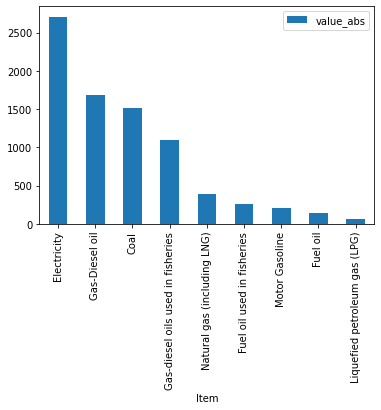

In [ ]:
df = pd.read_csv(WASTE_DATA)#Which form of energy causes the most emissions
df = pd.read_csv(ENERGY_DATA)
df['value_abs'] = df['Value'].abs()
df = df[df['Year'].isin(year_filter)]
df = df.groupby('Item').mean().sort_values(by='value_abs', ascending = False)
df = df[['value_abs']]
df.plot.bar()

In [ ]:
# Question 3

df = pd.read_csv(WASTE_DATA)
df['avg_waste_burned'] = df['Value'].abs()

avg_df = df[['Area', 'Year', 'avg_waste_burned']]
avg_df = avg_df.groupby(['Area'], as_index=False).mean() 
avg_df = avg_df[avg_df['avg_waste_burned'] != 0]
fig = px.choropleth(avg_df, locations='Area', locationmode='country names', color='avg_waste_burned', hover_name='Area')

fig.show()

# Do we want to see waste growth overtime?
  # if so: what interval of time should we display for?
  

In [ ]:
#Which countries have missing data? For which years?
df = pd.read_csv(WASTE_DATA)

df = df[df['Value'] != 0]
df = df[['Area','Year']]
df.isnull().any()
countries = df['Area'].unique()

gp = df.groupby('Area')

keys = [key for key, _ in gp]

gp.get_group(keys[0])['Year']

country_year_dict = {}

for key in keys:
  country_year_dict[key] = list(gp.get_group(key)['Year'])

desired_years = range(1990,2020)
for country in country_year_dict:
  country_year_dict[country] = list(set(list(gp.get_group(country)['Year'])).symmetric_difference(set(desired_years)))

country_year_dict

{'Afghanistan': [1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001],
 'Albania': [],
 'Andorra': [],
 'Antigua and Barbuda': [],
 'Argentina': [],
 'Armenia': [1990, 1991],
 'Aruba': [2018, 2019],
 'Australia': [],
 'Austria': [],
 'Azerbaijan': [1990, 1991],
 'Bahamas': [],
 'Bahrain': [],
 'Bangladesh': [],
 'Barbados': [],
 'Belarus': [1990, 1991],
 'Belgium': [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999],
 'Belgium-Luxembourg': [2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019],
 'Bhutan': [2019],
 'Bolivia (Plurinational State of)': [],
 'Bosnia and Herzegovina': [1990, 1991, 1992, 1993],
 'Brazil': [],
 'Brunei Darussalam': [],
 'Bulgaria': [],
 'Cambodia': [1990, 1991, 1992],
 'Canada': [],
 'Cayman Islands': [1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  200

In [ ]:
# Do we want to see waste growth overtime?
import plotly.io as pio
import plotly.express as px

pio.templates.default = "none"

df = pd.read_csv(WASTE_DATA)
#df = df[df['Value'] != 0]
fig = px.choropleth(df, locations='Area Code (ISO3)', color='Value', animation_frame='Year')
fig.show()

In [ ]:
df = pd.read_csv(WASTE_DATA)
most_waste_countries = list(df.groupby(['Area']).mean().sort_values(by=['Value'], ascending = False).head(5).index.values)
df = df[df['Area'].isin(most_waste_countries)]

fig = px.line(df, x="Year", y="Value", title='Waste Incineration', color = 'Area')
fig.show()


In [ ]:
df = pd.read_csv(LAND_DATA)
#What is the most common kind of land cover?
df.groupby('Item').sum().sort_values(by='Value',ascending = False)
#Tree cover is the most common type of land cover

Element Code  Item Code  \
Item                                                                          
Tree-covered areas                                      21730380   30267160   
Grassland                                               21730380   30306220   
Terrestrial barren land                                 21730380   30288860   
Shrub-covered areas                                     21730380   30275840   
Herbaceous crops                                        21730380   30254140   
Permanent snow and glaciers                             21730380   30293200   
Inland water bodies                                     21730380   30297540   
Shrubs and/or herbaceous vegetation, aquatic or...      21730380   30280180   
Artificial surfaces (including urban and associ...      21730380   30249800   
Mangroves                                               21730380   30271500   
Coastal water bodies and intertidal areas               21730380   30301880   
Multiple or layered crops                               21730380   30262820   
Sparsely natural vegetated areas                        21730380   30284520   
Woody crops                                             21730380   30258480   

                                                    Year Code     Year  \
Item                                                                     
Tree-covered areas                                    8721305  8721305   
Grassland                                             8721305  8721305   
Terrestrial barren land                               8721305  8721305   
Shrub-covered areas                                   8721305  8721305   
Herbaceous crops                                      8721305  8721305   
Permanent snow and glaciers                           8721305  8721305   
Inland water bodies                                   8721305  8721305   
Shrubs and/or herbaceous vegetation, aquatic or...    8721305  8721305   
Artificial surfaces (including urban and associ...    8721305  8721305   
Mangroves                                             8721305  8721305   
Coastal water bodies and intertidal areas             8721305  8721305   
Multiple or layered crops                             8721305  8721305   
Sparsely natural vegetated areas                      8721305  8721305   
Woody crops                                           8721305  8721305   

                                                           Value  
Item                                                              
Tree-covered areas                                  9.422519e+07  
Grassland                                           5.912691e+07  
Terrestrial barren land                             4.027780e+07  
Shrub-covered areas                                 2.451093e+07  
Herbaceous crops                                    2.451092e+07  
Permanent snow and glaciers                         2.192575e+07  
Inland water bodies                                 8.909237e+06  
Shrubs and/or herbaceous vegetation, aquatic or...  1.829240e+06  
Artificial surfaces (including urban and associ...  1.528639e+06  
Mangroves                                           3.684049e+05  
Coastal water bodies and intertidal areas           0.000000e+00  
Multiple or layered crops                           0.000000e+00  
Sparsely natural vegetated areas                    0.000000e+00  
Woody crops                                         0.000000e+00

In [ ]:
# plotting the scatter chart
fig = px.scatter(df, x='Year', y="Item", color='Year',
                 symbol='Value', size='size', facet_row='day',
                 facet_col='time')
 
# showing the plot
fig.show()

In [ ]:
from math import log10
#How has tree coverage changed for the areas with the most tree coverage?
df = pd.read_csv(LAND_DATA)

df = df[df['Item'] == 'Tree-covered areas']
most_tree_covered_countries = list(df.groupby(['Area']).mean().sort_values(by=['Value'], ascending = False).head(5).index.values)
df = df[df['Area'].isin(most_tree_covered_countries)]

fig = px.line(df, x="Year", y="Value", title='Waste Incineration', color = 'Area',log_y = True)
fig.show()

In [ ]:
# How has coverage changed over time
df = pd.read_csv(LAND_DATA)

df = df[df['Item'] != 'Artificial surfaces (including urban and associated areas)']
df = df[df['Item'] != 'Terrestrial barren land']
df = df[df['Item'] != 'Coastal water bodies and intertidal areas']

df = df.groupby(['Item','Year'], as_index = False).sum()

fig = px.line(df, x="Year", y="Value", title='Waste Incineration', color = 'Item')
fig.show()

In [ ]:
df = pd.read_csv (WORLD_POPULATION)

countries_of_interest = ['HKG', 'CHN', 'USA','RUS','IND']
df = df[df['Country Code'].isin(countries_of_interest)]
df.head()
#print(df.columns)
#df.drop(df.columns['1960', '1961', '1962','1963','1964', '1965','1966','1967', '1968', '1969', '1970'], axis = 1)

#df.head()
#for time_frames in df:
 # print(time_frames)



# success story, -- coming together and solving the problem (12pm  COI)
#df.drop([df[1960]],axis=1)


Country Name Country Code     Indicator Name Indicator Code  \
40                  China          CHN  Population, total    SP.POP.TOTL   
96   Hong Kong SAR, China          HKG  Population, total    SP.POP.TOTL   
109                 India          IND  Population, total    SP.POP.TOTL   
202    Russian Federation          RUS  Population, total    SP.POP.TOTL   
251         United States          USA  Population, total    SP.POP.TOTL   

            1960         1961         1962         1963         1964  \
40   667070000.0  660330000.0  665770000.0  682335000.0  698355000.0   
96     3075605.0    3168100.0    3305200.0    3420900.0    3504600.0   
109  450547675.0  459642166.0  469077191.0  478825602.0  488848139.0   
202  119897000.0  121236000.0  122591000.0  123960000.0  125345000.0   
251  180671000.0  183691000.0  186538000.0  189242000.0  191889000.0   

            1965  ...          2013          2014          2015          2016  \
40   715185000.0  ...  1.363240e+09  1.371860e+09  1.379860e+09  1.387790e+09   
96     3597900.0  ...  7.178900e+06  7.229500e+06  7.291300e+06  7.336600e+06   
109  499123328.0  ...  1.280842e+09  1.295601e+09  1.310152e+09  1.324517e+09   
202  126745000.0  ...  1.435070e+08  1.438197e+08  1.440969e+08  1.443424e+08   
251  194303000.0  ...  3.160599e+08  3.183863e+08  3.207390e+08  3.230718e+08   

             2017          2018          2019          2020          2021  \
40   1.396215e+09  1.402760e+09  1.407745e+09  1.411100e+09  1.412360e+09   
96   7.393200e+06  7.452600e+06  7.507900e+06  7.481000e+06  7.413100e+06   
109  1.338677e+09  1.352642e+09  1.366418e+09  1.380004e+09  1.393409e+09   
202  1.444967e+08  1.444779e+08  1.444063e+08  1.440731e+08  1.434461e+08   
251  3.251221e+08  3.268382e+08  3.283300e+08  3.315011e+08  3.318937e+08   

     Unnamed: 66  
40           NaN  
96           NaN  
109          NaN  
202          NaN  
251          NaN  

[5 rows x 67 columns]

In [ ]:
year_filter=range(1990,2021)
df = pd.read_csv(TEMPERATURE_DATA)
df = df[df['Year'].isin(year_filter)]
highest_energy_use_countries = list(df.groupby(['Area']).mean().sort_values(by=['Value'], ascending = False).head(5).index.values)
df.loc[df['Area'].isin(highest_energy_use_countries)].groupby(['Area'])['Value'].mean()

Area
Estonia                           1.500490
Luxembourg                        1.537676
Montenegro                        1.510120
Serbia                            1.548547
Svalbard and Jan Mayen Islands    2.001148
Name: Value, dtype: float64